---
Some useful $\LaTeX$ commands are defined in this cell:
$$
\newcommand{\abs}[1]{\left\lvert#1\right\rvert}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\set}[1]{\left\{#1\right\}}
\newcommand{\paren}[1]{\left(#1\right)}
\newcommand{\brack}[1]{\left[#1\right]}
\newcommand{\ip}[2]{\left\langle#1,#2\right\rangle}
\DeclareMathOperator{\span}{span}
\DeclareMathOperator{\fl}{fl}
\abs{x}, \norm{x}, \set{x}, \paren{x}, \brack{x}, \ip{x}{y}, \span, \fl
$$

---

---
# 15.1 Basic quadrature algorithms
---

The goal of this chapter is to determine 
<a href=https://en.wikipedia.org/wiki/Quadrature_(mathematics)>quadrature</a> formulas for approximating

$$
I_f = \int_a^b f(x)\,dx \approx \sum_{j=0}^n a_j f(x_j).
$$

We just need to determine the **quadrature weights** $a_j$ and **points** $x_j$.

---

### A simple approach

1. Compute the value of the function $f$ at a few points $x_0,\ldots,x_n \in [a,b]$.
2. Interpolate $(x_0,f(x_0)),\ldots,(x_n,f(x_n))$ with a polynomial $p_n$ written in Lagrange form:
$$
p_n(x) = \sum_{j=0}^n f(x_j) L_j(x).
$$
3. Then the integral of the polynomial $p_n$,
$$
\int_a^b p_n(x)\,dx = \sum_{j=0}^n a_j f(x_j), \quad a_j = \int_a^b L_j(x)\,dx,
$$
approximates the integral of $f$.

---

### Quadrature error

Recall that

$$
f(x) - p_n(x) = f[x_0,\ldots,x_n,x] \prod_{j=0}^n (x - x_j).
$$

Therefore, the **quadrature error** is

$$
\begin{align}
E(f) 
&= \int_a^b f(x)\,dx - \sum_{j=0}^n a_j f(x_j) \\
&= \int_a^b f(x)\,dx - \int_a^b p_n(x)\,dx \\
&= \int_a^b \bigl(f(x) - p_n(x)\bigr)\,dx \\
&= \int_a^b f[x_0,\ldots,x_n,x] \prod_{j=0}^n (x - x_j)\,dx.
\end{align}
$$

---

## Trapezoidal rule

Let $x_0 = a$ and $x_1 = b$. Then

$$
L_0(x) = \frac{x - b}{a - b}, \quad L_1(x) = \frac{x - a}{b - a}.
$$

Thus,

$$
a_0 = \int_a^b L_0(x)\,dx = \frac{b - a}{2}, \quad 
a_1 = \int_a^b L_1(x)\,dx = \frac{b - a}{2}.
$$

Therefore, the **trapezoidal rule** is

$$
\begin{align}
I_f \approx \sum_{j=0}^1 a_j f(x_j) 
&= \frac{b - a}{2} f(a) + \frac{b - a}{2} f(b)\\
&= \frac{b - a}{2} \bigl[f(a) + f(b)\bigr] =: I_{\mathrm{trap}}.
\end{align}
$$

---
## Example

$$
I_f = \int_0^1 \paren{\frac{4}{1+x^2}} dx = \pi
$$

Determine $I_{\mathrm{trap}}$.

In [1]:
f(x) = 4/(1 + x^2)

f (generic function with 1 method)

In [2]:
a, b = 0., 1.
If = π

π = 3.1415926535897...

In [3]:
Itrap = (b - a)/2 *(f(a) + f(b))

3.0

In [4]:
Ef = If - Itrap

0.14159265358979312

In [5]:
p1(x) = f(a)*(x - b)/(a - b) + f(b)*(x - a)/(b - a)

p1 (generic function with 1 method)

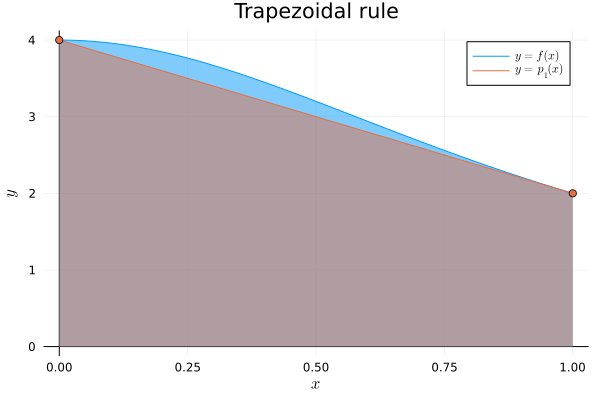

In [6]:
using Plots, LaTeXStrings

xx = range(a, b, length=100)

plot(axes_style=:zerolines, title="Trapezoidal rule", xlabel=L"x", ylabel=L"y")
plot!(xx, f.(xx), ribbon=(f.(xx),zeros(length(xx))), label=L"y = f(x)")
plot!(xx, p1.(xx), ribbon=(p1.(xx),zeros(length(xx))), label=L"y = p_1(x)")
scatter!([a,b], [f(a),f(b)], c=2, label=:none)

---

Recall:

> ## Theorem: (Intermediate Value Theorem)
> If $f \in C[a,b]$ and $s$ is a value such that $f(\alpha) \leq s \leq f(\beta)$ for some $\alpha, \beta \in [a,b]$, then there exists a $c \in [a,b]$ such that $f(c) = s$.

We will use the Intermediate Value Theorem to prove:

> ## Theorem: (Mean Value Theorem for Integrals)
> If $g \in C[a,b]$ and $\psi$ is an integrable function such that $\psi(x) \geq 0$ for all $x \in [a,b]$ or $\psi(x) \leq 0$ for all $x \in [a,b].$ Then there exists $\xi \in [a,b]$ such that
$$
\int_a^b g(x) \psi(x)\,dx = g(\xi) \int_a^b \psi(x)\,dx.
$$

### Proof.

First observe that there exist $\alpha, \beta \in [a,b]$ such that $g(\alpha) = \min_{x \in [a,b]} g(x)$ and $g(\beta) = \max_{x \in [a,b]} g(x)$. Then

$$
g(\alpha) \leq g(x) \leq g(\beta), \quad \forall x \in [a,b].
$$

Suppose that $\psi(x) \geq 0$ for all $x \in [a,b]$. Then

$$
g(\alpha)\psi(x) \leq g(x)\psi(x) \leq g(\beta)\psi(x), \quad \forall x \in [a,b].
$$

Thus,

$$
\int_a^b g(\alpha)\psi(x)\,dx \leq \int_a^b g(x)\psi(x)\,dx \leq \int_a^b g(\beta)\psi(x)\,dx.
$$

Letting $s = \int_a^b g(x)\psi(x)\,dx$, we have

$$
g(\alpha) \int_a^b \psi(x)\,dx \leq s \leq g(\beta) \int_a^b \psi(x)\,dx.
$$

Let $f(x) = g(x) \int_a^b \psi(x)\,dx$. Then $f \in C[a,b]$ and $f(\alpha) \leq s \leq f(\beta)$, so by the Intermediate Value Theorem, there is a $\xi \in [a,b]$ such that $f(\xi) = s$; that is,

$$
g(\xi) \int_a^b \psi(x)\,dx = \int_a^b g(x) \psi(x)\,dx.
$$

The other case of $\psi(x) \leq 0$ for all $x \in [a,b]$ can be proven in a similar way. $\blacksquare$

---

## Trapezoidal rule error

Recall that the error is

$$
E(f) = \int_a^b f[x_0,\ldots,x_n,x] \prod_{j=0}^n (x - x_j)\,dx.
$$

For the Trapezoidal rule, we have

$$
E(f) = \int_a^b f[a,b,x] (x - a)(x - b)\,dx.
$$

Let $\psi(x) = (x - a)(x - b)$. Then $\psi(x) \leq 0$ for all $x \in [a,b]$. Therefore, by the **Mean Value Theorem for Integrals** we have

$$
E(f) = f[a,b,\xi_1] \int_a^b (x - a)(x - b)\,dx.
$$

By the **Divided Difference and Derivative Theorem** from Section 10.5, there is a $\xi \in (a, b)$ such that $f[a,b,\xi_1] = \frac{f''(\xi)}{2}$. Also, 

$$
\int_a^b (x - a)(x - b)\,dx = -\frac{(b - a)^3}{6}.
$$

Therefore,

$$
E(f) = I_f - I_{\mathrm{trap}} =  -\frac{f''(\xi)}{12}(b - a)^3,
$$

for some $\xi \in (a,b)$.

---

## Midpoint rule

Let $x_0 = \frac{a+b}{2}$. Then

$$
L_0(x) = 1.
$$

Thus,

$$
a_0 = \int_a^b L_0(x)\,dx = b - a, \quad 
$$

Therefore, the **midpoint rule** is

$$
\begin{align}
I_f \approx \sum_{j=0}^0 a_j f(x_j) 
&= (b - a)\;f\paren{\frac{a+b}{2}} =: I_{\mathrm{mid}}.
\end{align}
$$

The error is given by

$$
E(f) = I_f - I_{\mathrm{mid}} = \frac{f''(\xi)}{24}(b - a)^3,
$$

for some $\xi \in (a,b)$.

---
## Example

$$
I_f = \int_0^1 \paren{\frac{4}{1+x^2}} dx = \pi
$$

Determine $I_{\mathrm{mid}}$.

In [7]:
Imid = (b - a) * f((a+b)/2)

3.2

In [8]:
Ef = If - Imid

-0.05840734641020706

In [9]:
p0(x) = f((a + b)/2)

p0 (generic function with 1 method)

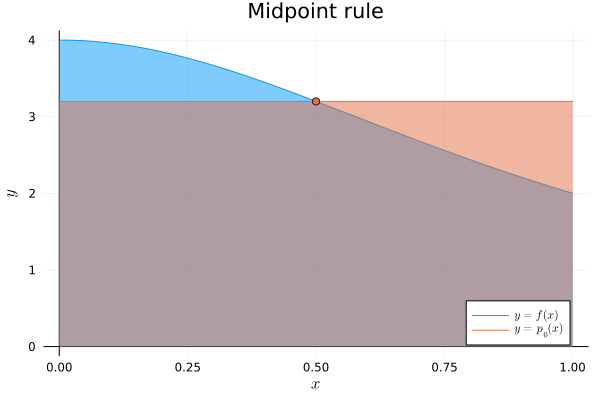

In [10]:
xx = range(a, b, length=100)

plot(axes_style=:zerolines, title="Midpoint rule", xlabel=L"x", ylabel=L"y")
plot!(xx, f.(xx), ribbon=(f.(xx),zeros(length(xx))), label=L"y = f(x)")
plot!(xx, p0.(xx), ribbon=(p0.(xx),zeros(length(xx))), label=L"y = p_0(x)")
scatter!([(a+b)/2], [f((a+b)/2)], c=2, label=:none)

---

## Simpson rule

Let $x_0 = a$, $x_1 = x_m$, and $x_2 = b$, where $x_m = \frac{a+b}{2}$. Then

$$
L_0(x) = \frac{(x - x_m)(x - b)}{(a - x_m)(a - b)}, \quad 
L_1(x) = \frac{(x - a)(x - b)}{(x_m - a)(x_m - b)}, \quad
L_2(x) = \frac{(x - a)(x - x_m)}{(b - a)(b - x_m)}.
$$

Thus,

$$
a_0 = \int_a^b L_0(x)\,dx = \frac{1}{6}(b-a), \quad 
a_1 = \int_a^b L_1(x)\,dx = \frac{2}{3}(b-a), \quad
a_2 = \int_a^b L_2(x)\,dx = \frac{1}{6}(b-a). \quad 
$$

Therefore, the **Simpson rule** is

$$
\begin{align}
I_f \approx \sum_{j=0}^2 a_j f(x_j) 
&= \frac{1}{6}(b-a) f(a) + \frac{2}{3}(b-a) f(x_m) + \frac{1}{6}(b-a) f(b)\\
&= \frac{b - a}{6} \brack{f(a) + 4f\paren{\frac{b+a}{2}} + f(b)}=: I_{\mathrm{Simp}}.
\end{align}
$$

The error is given by

$$
E(f) = I_f - I_{\mathrm{Simp}} = -\frac{f''''(\xi)}{90}\paren{\frac{b - a}{2}}^5,
$$

for some $\xi \in (a,b)$.

---
## Example

$$
I_f = \int_0^1 \paren{\frac{4}{1+x^2}} dx = \pi
$$

Determine $I_{\mathrm{Simp}}$.

In [11]:
ISimp = (b - a)/6 * (f(a) + 4f((a+b)/2) + f(b))

3.1333333333333333

In [12]:
Ef = If - ISimp

0.008259320256459812

In [13]:
m = (a + b)/2
p2(x) = 
    f(a)*(x - m)*(x - b)/(a - m)/(a - b) + 
    f(m)*(x - a)*(x - b)/(m - a)/(m - b) + 
    f(b)*(x - a)*(x - m)/(b - a)/(b - m)

p2 (generic function with 1 method)

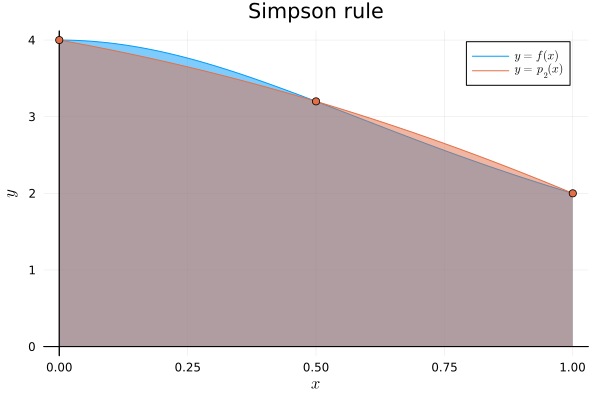

In [14]:
xx = range(a, b, length=100)

plot(axes_style=:zerolines, title="Simpson rule", xlabel=L"x", ylabel=L"y")
plot!(xx, f.(xx), ribbon=(f.(xx),zeros(length(xx))), label=L"y = f(x)")
plot!(xx, p2.(xx), ribbon=(p2.(xx),zeros(length(xx))), label=L"y = p_2(x)")
hline!([0],c=:black, label=:none)
vline!([0],c=:black, label=:none)
scatter!([a,m,b], [f(a),f(m),f(b)], c=2, label=:none)

---

## Quadrature rules

$$
\begin{align}
\\
\int_a^b f(x)\,dx &= (b - a)\;f\paren{\frac{a+b}{2}} + \frac{f''(\xi)}{24} (b - a)^3 \quad &\text{(Midpoint)} \\\\
\int_a^b f(x)\,dx &= \frac{b - a}{2}\brack{f(a) + f(b)} -\frac{f''(\xi)}{12} (b - a)^3 \quad &\text{(Trapezoidal)} \\\\
\int_a^b f(x)\,dx &= \frac{b - a}{6}\brack{f(a) + 4f\paren{\frac{a+b}{2}} + f(b)} -\frac{f''''(\xi)}{90} \paren{\frac{b - a}{2}}^5\quad &\text{(Simpson)} \\\\
\end{align}
$$

In each case, $\xi$ is some unknown point in the interval $(a,b)$.

## Precision

-   If $f$ is a polynomial of degree at most **one**, then the **midpoint and trapezoidal rules  are exact**, so we say that these rules have **precision 1**.

-   If $f$ is a polynomial of degree at most **three**, then the **Simpson rule is exact**, so we say that the Simpson rule has **precision 3**.

---

## Example

Let 

$$f(x) = x^3 - 14x^2 + 49x + 14,$$

so we have

$$\int_0^{10} f(x)\,dx = \left. \frac{x^4}{4} - \frac{14x^3}{3} + \frac{49x^2}{2} + 14x \right |_0^{10} = \frac{1270}{3}.$$

By the **Simpson rule**, we have

$$
\begin{split}
\int_0^{10} f(x)\,dx 
& = \frac{10}{6}( f(0) + 4f(5) + f(10) ) - \frac{f''''(\xi)}{90}5^5 \\
& = \frac{10}{6}( 14 + 4 \cdot 34 + 104 ) - 0 \\
& = \frac{1270}{3}.
\end{split}
$$

This implies that the area under the graph of the quadratic polynomial that interpolates the data $(0,14)$, $(5,34)$, and $(10,104)$,

$$p_2(x) = x^2 - x + 14,$$

is equal to the area under the cubic polynomial $f(x)$.

In [15]:
f(x) = x^3 - 14x^2 + 49x + 14
p2(x) = x^2 - x + 14

p2 (generic function with 1 method)

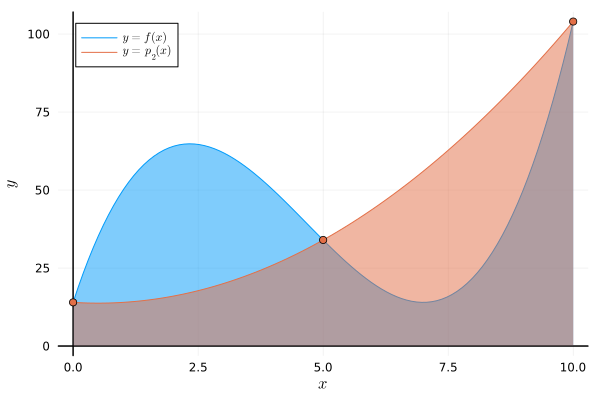

In [16]:
a, b = 0, 10

# Plot the cubic function f and the interpolating polynomial p2
xx = range(a, b, length=100)

plot(axes_style=:zerolines, legend=:topleft, xlabel=L"x", ylabel=L"y")
plot!(xx, f.(xx), ribbon=(f.(xx),zeros(length(xx))), label=L"y = f(x)")
plot!(xx, p2.(xx), ribbon=(p2.(xx),zeros(length(xx))), label=L"y = p_2(x)")
hline!([0],c=:black, label=:none)
vline!([0],c=:black, label=:none)
scatter!([a, (a+b)/2, b], [f(a), f((a+b)/2), f(b)], c=2, label=:none)

The area under the blue and red curves are equal, although the blue curve is the graph of a cubic polynomial and the red curve is the graph of a quadratic polynomial.

---